In [ ]:
import numpy as np
import pandas as pd 
    
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
!pip install protobuf==3.20.0

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
print(f"TensorFlow Version: {tf.__version__}")

TensorFlow Version: 2.18.0


In [4]:
IMAGE_SIZE = (256, 256)
BATCH_SIZE = 32
NUM_CLASSES = 38
DATA_DIR = '../input/plantvillage'

print(f"Image size set to: {IMAGE_SIZE}")
print(f"Data directory is: {DATA_DIR}")

Image size set to: (256, 256)
Data directory is: ../input/plantvillage


In [6]:
train_dir = '../input/plantvillage/PlantVillage/train'
val_dir = '../input/plantvillage/PlantVillage/val'
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

class_names = train_ds.class_names
print(f"Loaded {len(class_names)} classes.")
print(f"First 5 classes: {class_names[:5]}...")

Found 43444 files belonging to 38 classes.
Found 10861 files belonging to 38 classes.
Loaded 38 classes.
First 5 classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']...


In [7]:
class FixedRandomShear(keras.layers.RandomShear):
    @classmethod
    def from_config(cls, config):
        if 'x_factor' in config:
            x_factor = config['x_factor']
            if isinstance(x_factor, list) and len(x_factor) == 2:
                config['x_factor'] = [abs(x_factor[0]), abs(x_factor[1])]
        return super().from_config(config)

print("Custom class 'FixedRandomShear' is now defined.")

Custom class 'FixedRandomShear' is now defined.


In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model

class FixedRandomShear(keras.layers.RandomShear):
    @classmethod
    def from_config(cls, config):
        if 'x_factor' in config:
            x_factor = config['x_factor']
            if isinstance(x_factor, list) and len(x_factor) == 2:
                config['x_factor'] = [abs(x_factor[0]), abs(x_factor[1])]
        return super().from_config(config)

print("Custom class 'FixedRandomShear' is now defined.")

def stack_function(inputs):
    return tf.stack(inputs, axis=1)

def sum_function(inputs):
    return tf.reduce_sum(inputs, axis=1)

model_path = "/kaggle/input/moe-model/keras/default/1/moe_model_delta1_change.keras"
loaded_moe_model = load_model(
    model_path,
    custom_objects={
        'FixedRandomShear': FixedRandomShear,
        'stack_function': stack_function,  
        'sum_function': sum_function,     
        'tf': tf
    },
    safe_mode=False
)

print("\nMixture of Experts model loaded successfully!")



Custom class 'FixedRandomShear' is now defined.

Mixture of Experts model loaded successfully!


In [9]:
import tensorflow as tf
from tensorflow import keras

loaded_moe_model = load_model(model_path, custom_objects={'FixedRandomShear': FixedRandomShear}, safe_mode=False)

for layer in loaded_moe_model.layers:
    if isinstance(layer, keras.layers.Lambda):
        
        if hasattr(layer.function, '__globals__'):
            layer.function.__globals__['tf'] = tf

loaded_moe_model.evaluate(val_ds)

I0000 00:00:1763234546.163231     120 cuda_dnn.cc:529] Loaded cuDNN version 90300


340/340 ━━━━━━━━━━━━━━━━━━━━ 239s 642ms/step - accuracy: 0.9764 - loss: 0.0699


[0.07533150166273117, 0.9749562740325928]

In [12]:
loaded_moe_model.evaluate(val_ds)

340/340 ━━━━━━━━━━━━━━━━━━━━ 249s 733ms/step - accuracy: 0.9763 - loss: 0.0724


[0.07533147931098938, 0.9749562740325928]

Generating LIME explanation... (this may take a minute)


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

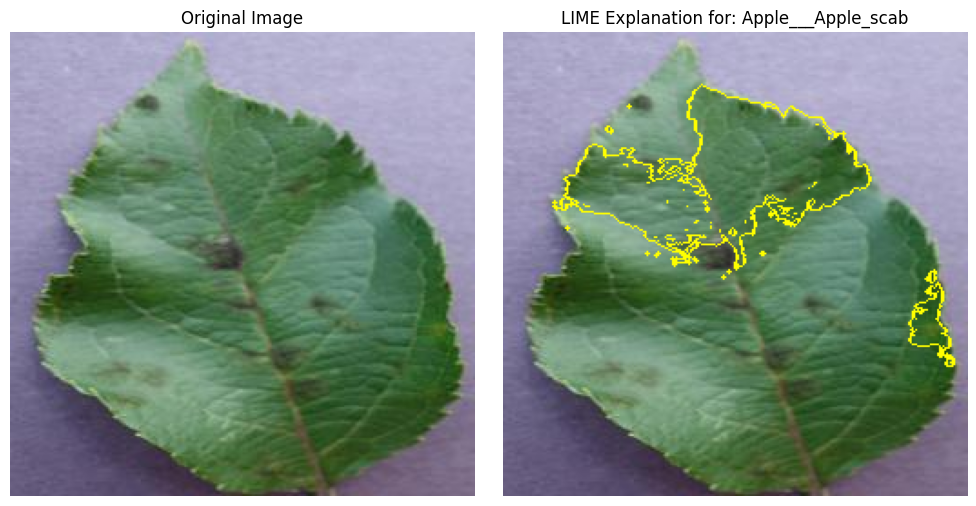

In [24]:
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

image_path = "/kaggle/input/plantvillage/PlantVillage/val/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG"

img = image.load_img(image_path, target_size=IMAGE_SIZE)

image_to_explain = image.img_to_array(img)

def predict_fn_moe(images):
    """
    This function takes a batch of images (from LIME)
    and returns a batch of probabilities (from our MoE model)
    """
    return loaded_moe_model.predict(images.astype('float32'))

explainer = lime_image.LimeImageExplainer()

print("Generating LIME explanation... (this may take a minute)")

explanation = explainer.explain_instance(
    image_to_explain.astype('double'), 
    predict_fn_moe, 
    top_labels=5, 
    hide_color=0, 
    num_samples=1000 
)

print("Explanation complete.")

preds = predict_fn_moe(np.expand_dims(image_to_explain, axis=0))
predicted_class = np.argmax(preds[0])

temp, mask = explanation.get_image_and_mask(
    predicted_class, 
    positive_only=True, 
    num_features=5, 
    hide_rest=False
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(image_to_explain.astype('uint8')) 
ax1.set_title(f"Original Image")
ax1.axis('off')

ax2.imshow(mark_boundaries(temp.astype('uint8'), mask))
ax2.set_title(f"LIME Explanation for: {class_names[predicted_class]}")
ax2.axis('off')

plt.tight_layout()
plt.show()

In [23]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, accuracy_score

all_moe_preds = []
all_true_labels = []

print("Starting evaluation on the entire validation set...")

for images, labels in val_ds:
    
    preds = loaded_moe_model.predict(images, verbose=0)
    
    predicted_classes_batch = np.argmax(preds, axis=1)
    
    all_moe_preds.extend(predicted_classes_batch)
    all_true_labels.extend(labels.numpy())

print("Evaluation complete.")

overall_accuracy = accuracy_score(all_true_labels, all_moe_preds)

print("\n--- Overall Performance (Your Expert of Models) ---")
print(f"Overall Accuracy: {overall_accuracy * 100:.2f}%")

class_names = val_ds.class_names
print("\nClassification Report (Precision, Recall, F1-Score):")
print(classification_report(all_true_labels, all_moe_preds, target_names=class_names))

Starting evaluation on the entire validation set...
Evaluation complete.

--- Overall Performance (Your Expert of Models) ---
Overall Accuracy: 97.50%

Classification Report (Precision, Recall, F1-Score):
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.88      0.93       126
                                 Apple___Black_rot       0.97      0.98      0.98       125
                          Apple___Cedar_apple_rust       1.00      1.00      1.00        55
                                   Apple___healthy       0.90      1.00      0.95       329
                               Blueberry___healthy       1.00      1.00      1.00       300
          Cherry_(including_sour)___Powdery_mildew       1.00      0.99      0.99       210
                 Cherry_(including_sour)___healthy       0.99      0.99      0.99       170
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0

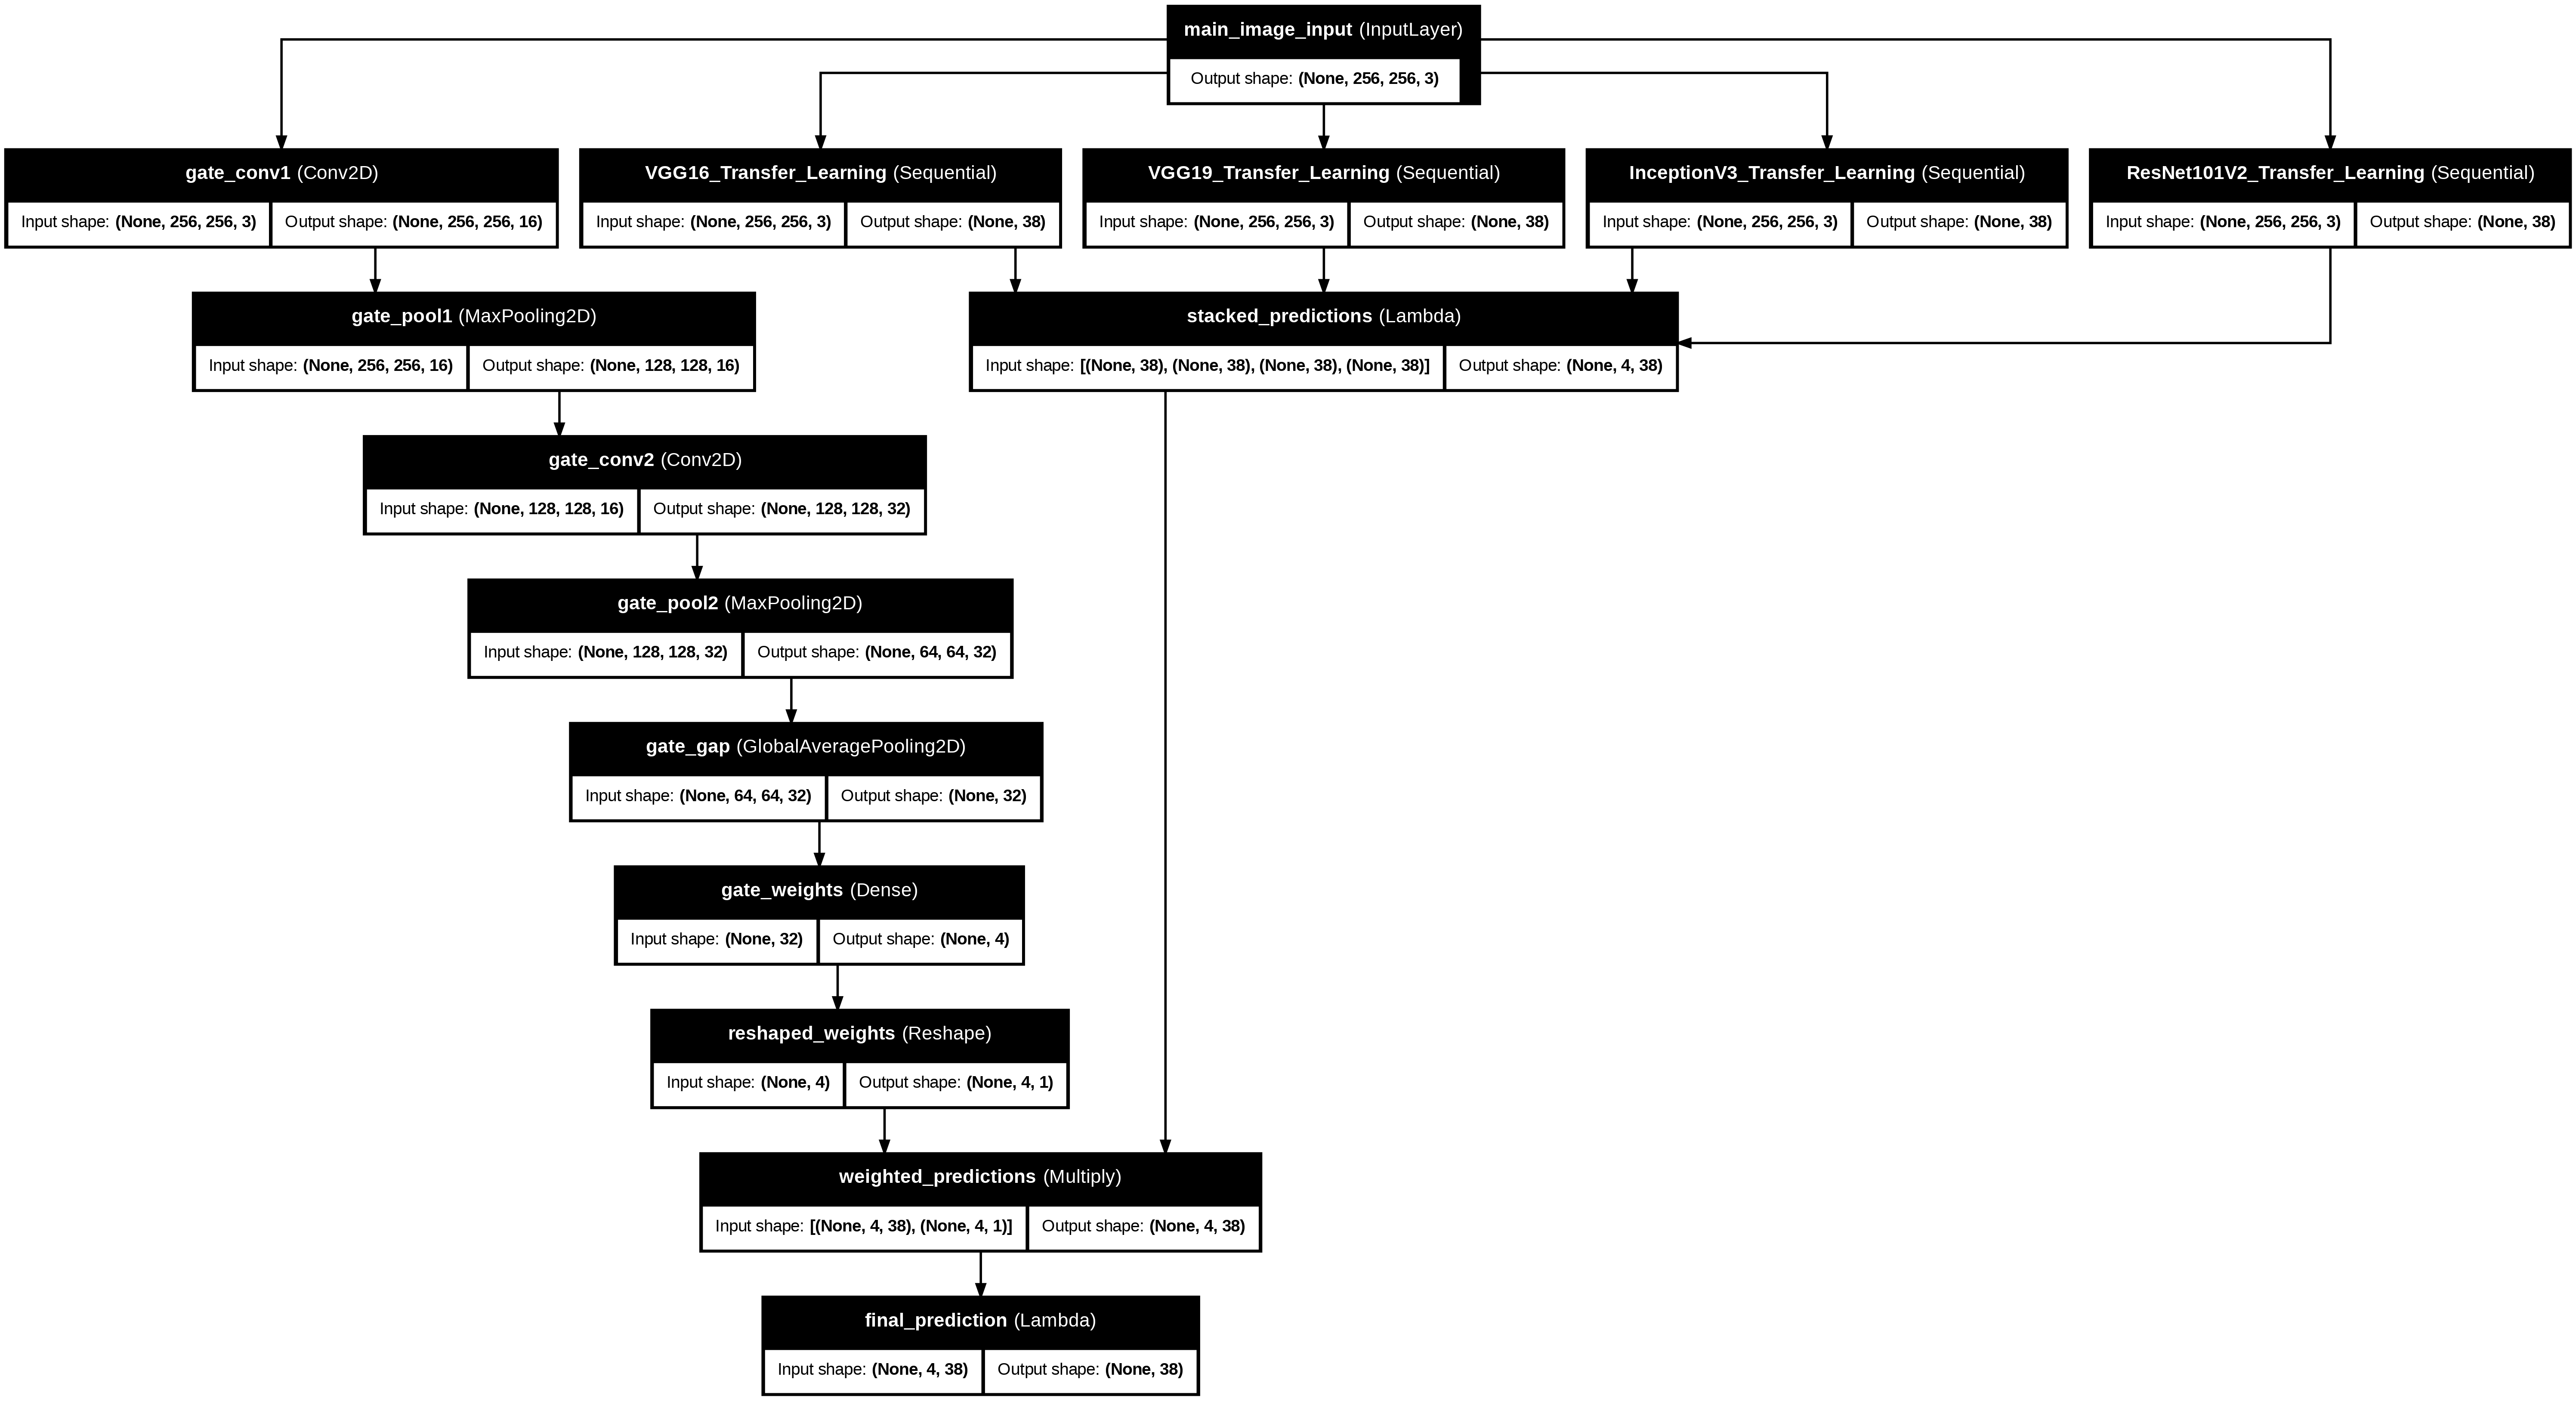

In [10]:
import tensorflow as tf

tf.keras.utils.plot_model(
    loaded_moe_model,  
    to_file='moe_model_diagram.png',
    show_shapes=True,
    show_layer_names=True
)